In [1]:
from wulpus.trx_conf.gen import WulpusTRXConfigGen
from wulpus.config_package import PGA_GAIN
from wulpus.uss_conf.gen import WulpusUSSConfigGen

trx_conf = WulpusTRXConfigGen()
trx_conf.add_config([7], [7], optimized_switching=False)

tx_confs = trx_conf.get_tx_configs()
rx_confs = trx_conf.get_rx_configs()

uss_conf = WulpusUSSConfigGen(num_acqs=1000,
                           dcdc_turnon=100,
                           start_hvmuxrx=500,
                           meas_period=50000,
                           num_txrx_configs=len(tx_confs),
                           tx_configs=tx_confs,
                           rx_configs=rx_confs,
                           rx_gain=PGA_GAIN[15],
                           pulse_freq=2250000,
                           num_pulses=2,
                           sampling_freq=8000000)

In [2]:
from wulpus.connection.connection import WulpusConnection

connection = WulpusConnection()

WulpusGuiSingleCh(children=(VBox(children=(HTML(value='<b>Connection</b>'), HBox(children=(HTML(value='Serial …

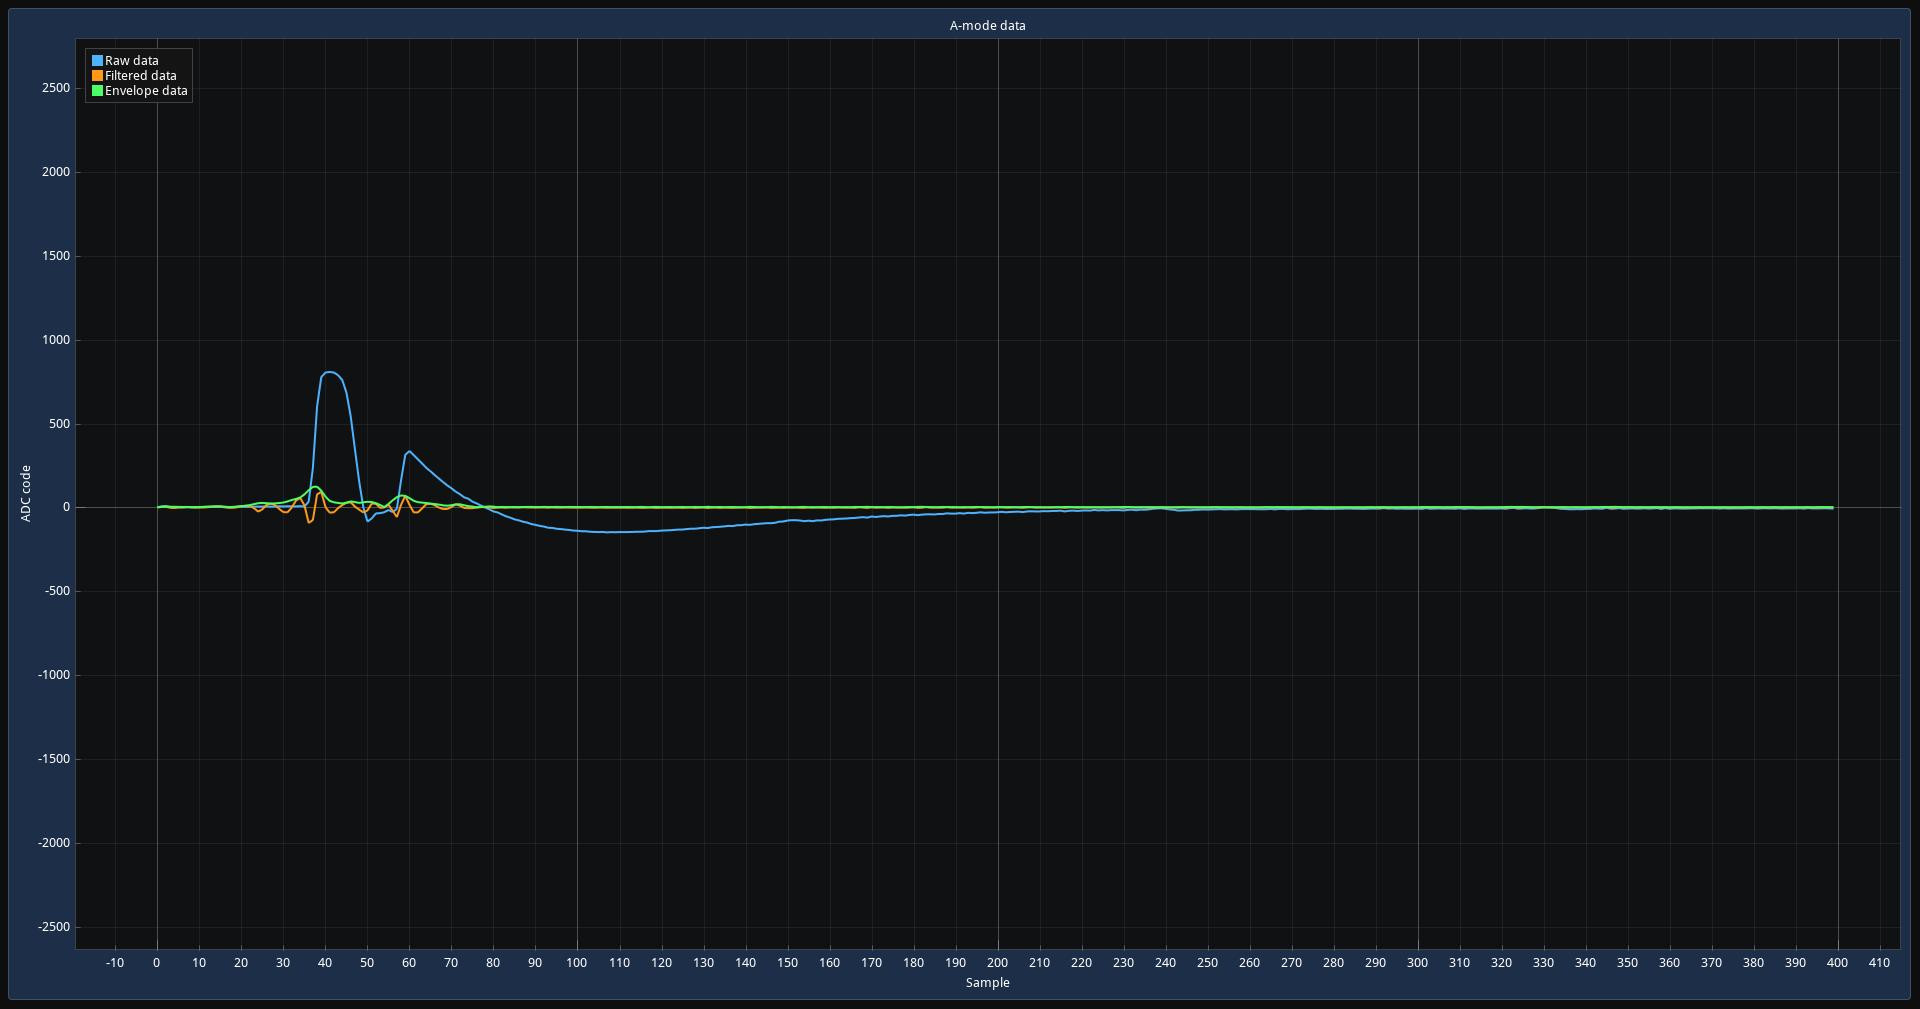

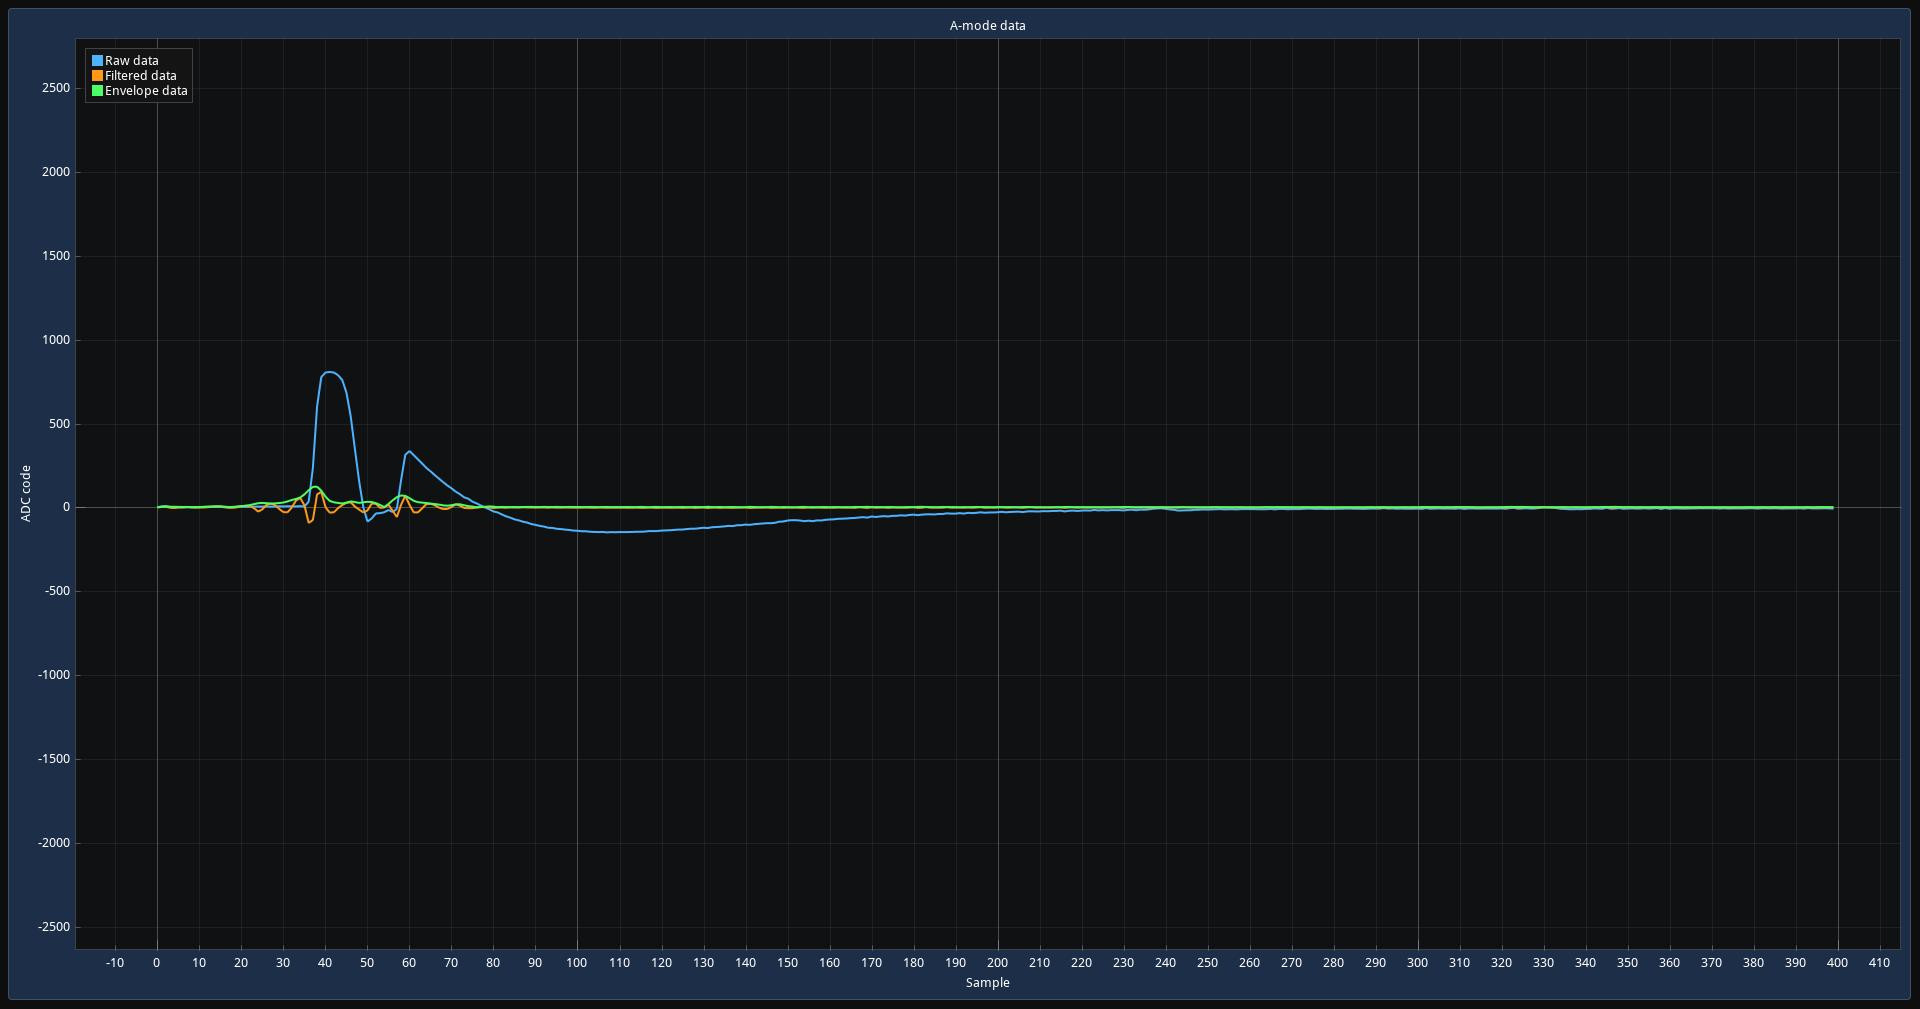

In [4]:
from wulpus.gui import WulpusGuiSingleCh

# If the GUI is already open and the port is opened, close it
if 'gui' in globals():
    gui.close_plot_window() # type: ignore  # noqa: F821
    if gui.port_opened: # type: ignore  # noqa: F821
        gui.com_link.close() # type: ignore  # noqa: F821

# Create the GUI
gui = WulpusGuiSingleCh(connection, uss_conf, dark_mode=True)

gui.save_location = "data"
gui.save_file_base = "test0"
gui.do_save = True

gui